# Part #03: Model Validation

## Step #01: Feature Selection REVISITED!

### Set up the workspace

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, learning_curve, validation_curve
from xgboost import XGBRegressor

In [2]:
# Read the results from before:
with open("./assets/preprocessing_results.pkl", mode="rb") as file_bin:
    resulst = pickle.load(file_bin)

In [3]:
# Unpack train and test sets:
feature_names, X_train, X_test, y_train, y_test = resulst.values()

### Perform backward feature elimination to exclude less important features

In [4]:
# Recreate the df for training set:
X_train_df = pd.DataFrame(data=X_train, columns=feature_names)
X_train_df.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.214942,0.520164,-0.321703,-0.198341,-0.118187,-0.188172,0.0,1.0,0.0,0.0
1,-0.144113,-0.124863,0.220756,-0.532922,-0.222410,0.485221,1.0,0.0,0.0,0.0
2,0.344262,0.670272,0.546675,0.135608,-0.367483,0.008750,0.0,1.0,0.0,0.0
3,-0.031968,-0.119279,0.446305,0.461755,0.100104,0.610227,1.0,0.0,0.0,0.0
4,-0.141438,-0.058064,0.220756,-0.057328,0.570442,-0.356489,1.0,0.0,0.0,0.0


In [5]:
# Instantiate a candidate model:
xgb_reg = XGBRegressor()

In [6]:
# Define scoring function(s):
r2 = make_scorer(r2_score, greater_is_better=True)

Validating current performance...
Validating current performance done in 0.17 minutes!

Validating longitude...
Validating longitude done in 0.13 minutes!

Validating latitude...
Validating latitude done in 0.18 minutes!

Validating housing_median_age...
Validating housing_median_age done in 0.17 minutes!

Validating total_rooms...
Validating total_rooms done in 0.13 minutes!

Validating population...
Validating population done in 0.13 minutes!

Validating median_income...
Validating median_income done in 0.10 minutes!

Validating ocean_proximity_1H OCEAN...
Validating ocean_proximity_1H OCEAN done in 0.15 minutes!

Validating ocean_proximity_INLAND...
Validating ocean_proximity_INLAND done in 0.13 minutes!

Validating ocean_proximity_NEAR BAY...
Validating ocean_proximity_NEAR BAY done in 0.13 minutes!

Validating ocean_proximity_NEAR OCEAN...
Validating ocean_proximity_NEAR OCEAN done in 0.13 minutes!

                             min  mean   max
ocean_proximity_NEAR OCEAN  0.82  0.8

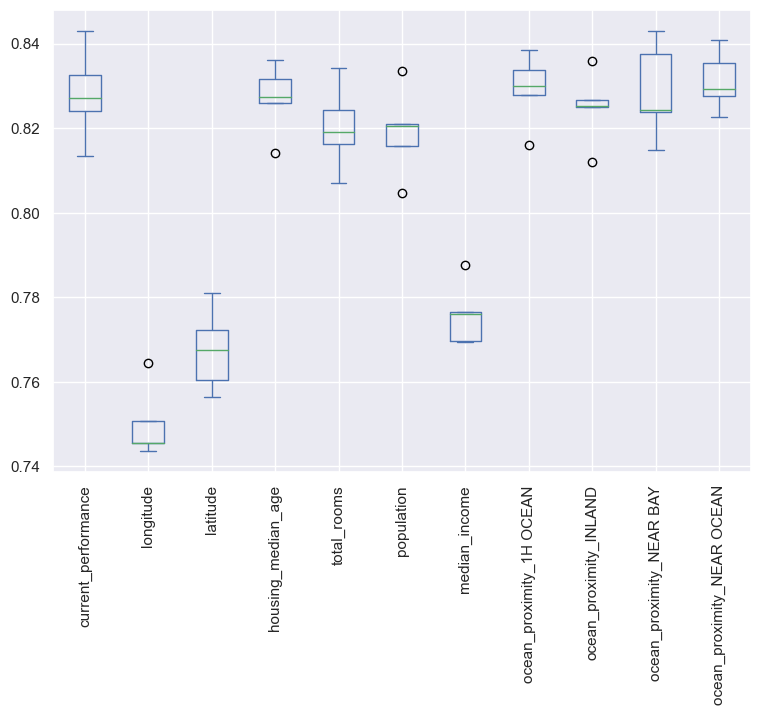

In [7]:
%%time
# Compare different features:
%run "./recipes/compare_features.py";
results = compare_features(xgb_reg, X_train_df, y_train, r2, cv=10);

In [8]:
# Drop irrelevant features:
X_train_df = X_train_df.drop(results.index[:2], axis=1)

Validating current performance...
Validating current performance done in 0.17 minutes!

Validating longitude...
Validating longitude done in 0.13 minutes!

Validating latitude...
Validating latitude done in 0.13 minutes!

Validating housing_median_age...
Validating housing_median_age done in 0.13 minutes!

Validating total_rooms...
Validating total_rooms done in 0.13 minutes!

Validating population...
Validating population done in 0.13 minutes!

Validating median_income...
Validating median_income done in 0.08 minutes!

Validating ocean_proximity_INLAND...
Validating ocean_proximity_INLAND done in 0.13 minutes!

Validating ocean_proximity_NEAR BAY...
Validating ocean_proximity_NEAR BAY done in 0.13 minutes!

                           min  mean   max
ocean_proximity_NEAR BAY  0.82  0.83  0.84
housing_median_age        0.82  0.83  0.83
current_performance       0.82  0.83  0.84
ocean_proximity_INLAND    0.81  0.82  0.83
population                0.81  0.82  0.83
total_rooms             

<Figure size 640x480 with 0 Axes>

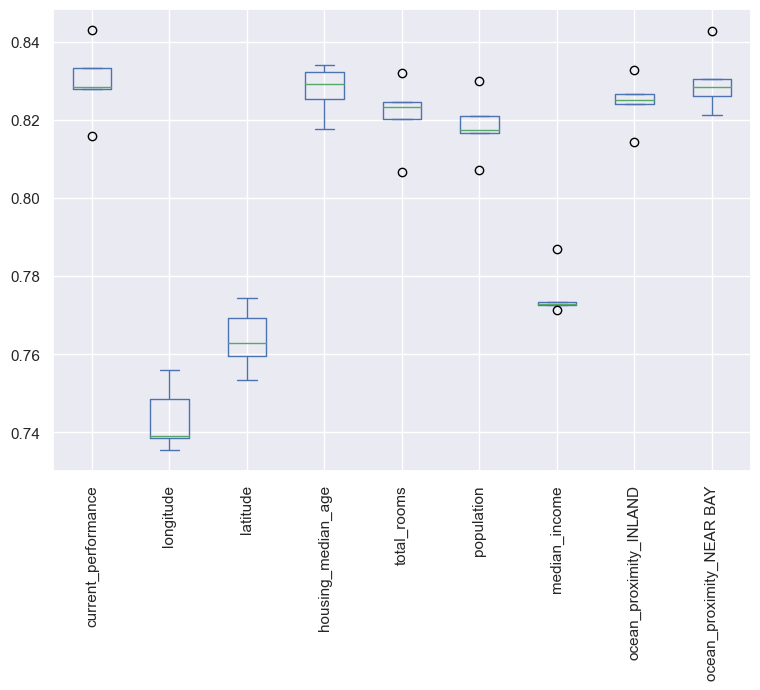

In [9]:
%%time
# Compare remaining features:
%run "./recipes/compare_features.py";
results = compare_features(xgb_reg, X_train_df, y_train, r2, cv=10);

In [10]:
# Drop irrelevant features:
X_train_df = X_train_df.drop(results.index[:2], axis=1)

Validating current performance...
Validating current performance done in 0.17 minutes!

Validating longitude...
Validating longitude done in 0.13 minutes!

Validating latitude...
Validating latitude done in 0.12 minutes!

Validating total_rooms...
Validating total_rooms done in 0.12 minutes!

Validating population...
Validating population done in 0.12 minutes!

Validating median_income...
Validating median_income done in 0.08 minutes!

Validating ocean_proximity_INLAND...
Validating ocean_proximity_INLAND done in 0.13 minutes!

                         min  mean   max
current_performance     0.81  0.83  0.83
ocean_proximity_INLAND  0.81  0.83  0.84
population              0.81  0.82  0.83
total_rooms             0.80  0.82  0.83
median_income           0.77  0.77  0.78
latitude                0.73  0.74  0.75
longitude               0.71  0.72  0.72


CPU times: total: 3min 8s
Wall time: 55.3 s


<Figure size 640x480 with 0 Axes>

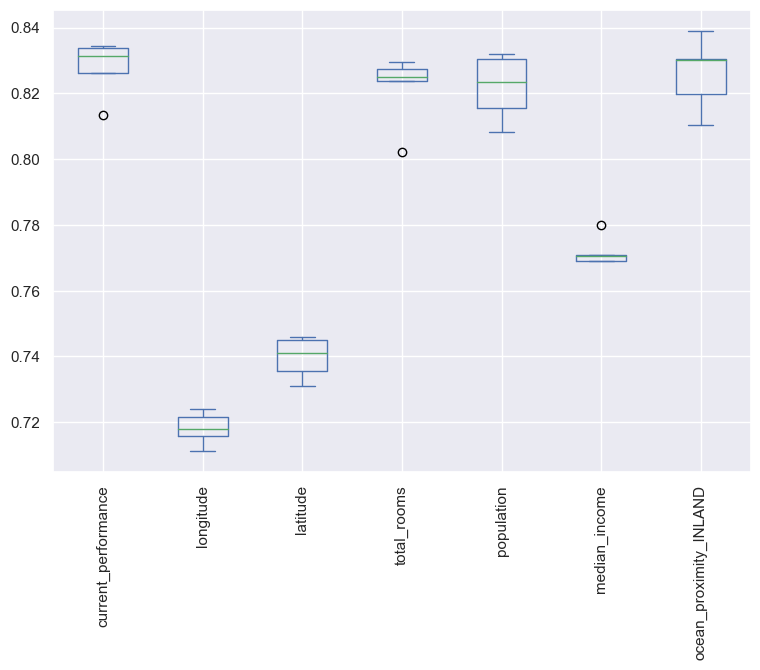

In [11]:
%%time
# Compare remaining features:
%run "./recipes/compare_features.py";
results = compare_features(xgb_reg, X_train_df, y_train, r2, cv=10);

## Step #02: Plotting the Learning Curve

In [12]:
%%time
# Perform CV on different sample sizes:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_reg,
    X_train_df,
    y_train,
    train_sizes=np.linspace(start=0.2, stop=1.0, num=5),
    cv=10,
    scoring=r2,
    random_state=42
)

CPU times: total: 3min 51s
Wall time: 1min 6s


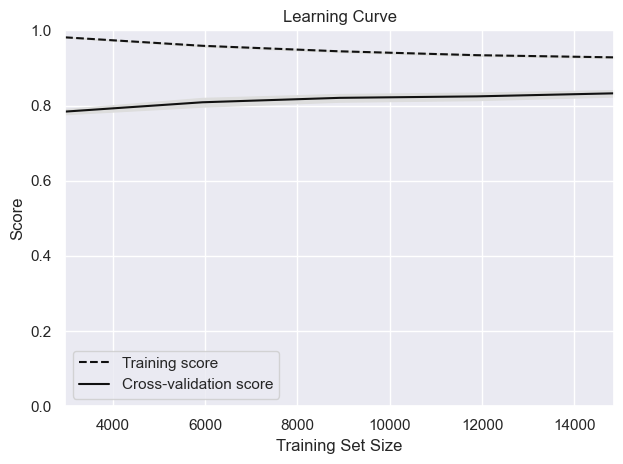

In [13]:
# Plot the learning curve:
%run "./recipes/plot_learning_curve.py"
plot_learning_curve(train_sizes, train_scores, test_scores);

## Step #03: Plotting the Validation Curve

## Step #04: Tuning the Model Hyperparameters